<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/RNN_Quest_1_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN_Quest_1: We will implement a pretrained RNN_Model and classify some artwork! After all, this is more fun than looking at welding seems or lung cancer data. 

You can download the data from: 

https://www.kaggle.com/ikarus777/best-artworks-of-all-time?select=artists.csv

Now only select the data in images of the following painters:

- Rembrandt
- Dürer
- Leonardo da Vinci
- Caravaggio 
- de Bongione 

These are required - if you want, you can also add others, like

- Michelangelo 

- Raffael

and even more. Just make sure that they are from sort of the same time and hence have a similar style. It's pretty easy to distinguish a Rembrandt from an Andy Warhol.

After you have done that, put the images into a data structure like in the Live-Coding last week. You can do that with the script from then (altered of course) - or just do it by hand. But please do not split into Train, Validation and Test set by hand. Use sklearn or any other method to randomly sample the images of each folder into the three sets. 




In [87]:
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [88]:
import glob
import cv2
import keras,os
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

In [89]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive')
# change directory
%cd /content/
# create new local directory, i.e. on the current machine which you are connected to
!mkdir local_data   # could also be another name than local_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [103]:
#/content/drive/MyDrive/Copy_Material_AIDA_2021/Specialization_ML3/Week_3/resized.zip
!unzip '/content/drive/MyDrive/Copy_Material_AIDA_2021/_spec_ML3_wolfgang/Week_3/resized.zip' -d local_data

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 extracting: local_data/resized/Henri_Matisse_78.jpg  
  inflating: local_data/resized/Henri_Matisse_79.jpg  
  inflating: local_data/resized/Henri_Matisse_8.jpg  
  inflating: local_data/resized/Henri_Matisse_80.jpg  
  inflating: local_data/resized/Henri_Matisse_81.jpg  
  inflating: local_data/resized/Henri_Matisse_82.jpg  
  inflating: local_data/resized/Henri_Matisse_83.jpg  
  inflating: local_data/resized/Henri_Matisse_84.jpg  
  inflating: local_data/resized/Henri_Matisse_85.jpg  
  inflating: local_data/resized/Henri_Matisse_86.jpg  
  inflating: local_data/resized/Henri_Matisse_87.jpg  
  inflating: local_data/resized/Henri_Matisse_88.jpg  
 extracting: local_data/resized/Henri_Matisse_89.jpg  
  inflating: local_data/resized/Henri_Matisse_9.jpg  
  inflating: local_data/resized/Henri_Matisse_90.jpg  
  inflating: local_data/resized/Henri_Matisse_91.jpg  
  inflating: local_data/resized/Henri_Matisse_92.jpg  


In [100]:
cd /content/

/content


In [ ]:
#!mkdir training_set
#!mkdir test_set

In [101]:
#ls -l

total 12
drwx------ 5 root root 4096 Mar 17 08:20 drive/
drwxr-xr-x 4 root root 4096 Mar 17 14:55 local_data/
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data/


In [102]:
#rm -r ./local_data/

In [104]:
#/content/local_data/resized
#data_path = 'C:/_dev/_aida/scientificProject/data/w_3/resized'
data_path = '/content/local_data/resized'

#/content/local_data/
#main_target_path = 'C:\\_dev\\_aida\\scientificProject\\data\\w_3\\'
main_target_path = '/content/local_data'


all_subdir = 'data_set'
train_subdir = 'train'
val_subdir = 'valid'
test_subdir = 'test'

train_size = 0.7
val_size = 0.15
test_size = 0.15

artist_list = ['Caravaggio','Giotto_di_Bondone','Leonardo_da_Vinci','Rembrandt','Albrecht_Duerer']
data_format = '/*.jpg'


# import and organize images

In [105]:
artist_list = ['Caravaggio','Giotto_di_Bondone','Leonardo_da_Vinci','Rembrandt','Albrecht_Duerer']

for file_name in listdir(data_path):
    print(file_name)

    #convert Albrecht_DuÔòá├¬rer
    if file_name.startswith('Albrecht_DuтХа├кrer'):
        new_file_name = file_name.replace('Albrecht_DuтХа├кrer','Albrecht_Duerer_x')
    elif file_name.startswith('Albrecht_Du╠Иrer'):
        new_file_name = file_name.replace('Albrecht_Du╠Иrer','Albrecht_Duerer_y')
    else:
        new_file_name = file_name

    for artist_name in artist_list:
        if new_file_name.startswith(artist_name):
            filepath = os.path.join(data_path,file_name)
            new_filepath = os.path.join(main_target_path,all_subdir,artist_name,new_file_name)

            #check dir and create
            if not os.path.exists(os.path.join(main_target_path,all_subdir,artist_name)):
                os.makedirs(os.path.join(main_target_path,all_subdir,artist_name))
            #move file
            try:
                os.rename(filepath, new_filepath)
            except:
                continue

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Pablo_Picasso_427.jpg
Albrecht_DuтХа├кrer_17.jpg
Leonardo_da_Vinci_112.jpg
Henri_Matisse_65.jpg
Henri_Matisse_172.jpg
Edgar_Degas_476.jpg
Pablo_Picasso_5.jpg
Paul_Gauguin_48.jpg
Jan_van_Eyck_56.jpg
Albrecht_Du╠Иrer_133.jpg
Albrecht_Du╠Иrer_208.jpg
Giotto_di_Bondone_114.jpg
Vincent_van_Gogh_845.jpg
Albrecht_DuтХа├кrer_182.jpg
Edgar_Degas_591.jpg
Rembrandt_252.jpg
Joan_Miro_23.jpg
Giotto_di_Bondone_55.jpg
Andy_Warhol_53.jpg
Edgar_Degas_355.jpg
El_Greco_50.jpg
Edgar_Degas_480.jpg
Piet_Mondrian_29.jpg
Mikhail_Vrubel_84.jpg
Pierre-Auguste_Renoir_259.jpg
Pieter_Bruegel_71.jpg
Andy_Warhol_175.jpg
Edgar_Degas_521.jpg
Gustave_Courbet_22.jpg
Albrecht_DuтХа├кrer_224.jpg
Gustav_Klimt_65.jpg
Alfred_Sisley_110.jpg
Marc_Chagall_190.jpg
Pieter_Bruegel_26.jpg
Albrecht_DuтХа├кrer_130.jpg
Pieter_Bruegel_25.jpg
Jackson_Pollock_7.jpg
Henri_de_Toulouse-Lautrec_22.jpg
Vincent_van_Gogh_118.jpg
Sandro_Botticelli_160.jpg
Francisco_Goya_11.jpg
Fr

In [95]:
import glob
data_format = '/*.jpg'

def number_of_images_in_path(target_path,data_format):
    print(target_path)
    img_path_list = glob.glob(target_path + data_format)
           
    n = len(img_path_list)
    print(f'Number of images: {n}\n')

for artist_name in artist_list:
    number_of_images_in_path(os.path.join(os.sep,target_path,testing_path,artist_name),data_format)

/content/local_data/testing_set/Caravaggio
Number of images: 55

/content/local_data/testing_set/Giotto_di_Bondone
Number of images: 119

/content/local_data/testing_set/Leonardo_da_Vinci
Number of images: 143

/content/local_data/testing_set/Rembrandt
Number of images: 262

/content/local_data/testing_set/Albrecht_Duerer
Number of images: 656



Now explore the data. 

- What are the different image dimensions?

- How are the labels distributed?

- What else would be useful to know?

In [96]:
def get_image_information(main_target_path,sub_path ,class_list ,data_format ):
    info_array = []#np.array([[0,8]])
    column_names = ['class','name','row','column','channel','shape','main_target_path','sub_path']

    for class_name in class_list:
        path = os.path.join(os.sep,main_target_path,sub_path,class_name)
        img_path_list = glob.glob(path + data_format)

        for img_path in img_path_list:
            img = cv2.imread(img_path)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            info_array.append([class_name,os.path.split(img_path)[-1],img.shape[0],img.shape[1],img.shape[2],img.shape,main_target_path,sub_path])

    df = pd.DataFrame(data=info_array,columns= column_names)
    return df

df =get_image_information(main_target_path=main_target_path,sub_path=all_subdir,class_list=artist_list,data_format=data_format)
df

,class,name,row,column,channel,shape,main_target_path,sub_path


In [30]:
df['size'] = df.apply(lambda x: x.row*x.column,axis=1)

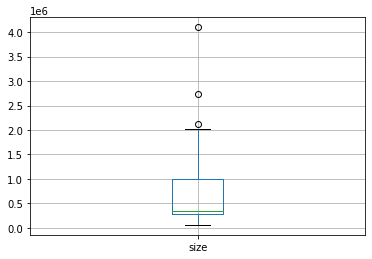

In [49]:
df[['size']].boxplot()

In [47]:
df['size'].quantile([0.25,0.5,0.75,1])

0.25     278142.0
0.50     345575.0
0.75     989959.5
1.00    4100656.0
Name: size, dtype: float64

In [50]:
df['size'].describe()

count    1.235000e+03
mean     5.997369e+05
std      4.604973e+05
min      6.030000e+04
25%      2.781420e+05
50%      3.455750e+05
75%      9.899595e+05
max      4.100656e+06
Name: size, dtype: float64

In [76]:
df_group = df.groupby('class').agg(img_count=('class','count'),size_mean=('size','mean'),size_min=('size','min'),size_max=('size','max')).reset_index()

In [74]:
import math
df_group['size_mean_sqrt'] = df_group['size_mean'].apply(lambda x: math.sqrt(x))

In [75]:
df_group

,class,img_count,size_mean,size_min,size_max,size_mean_sqrt
0,Albrecht_Duerer,656,736346.371951,93240,1866851,858.106271
1,Caravaggio,55,872363.345455,158760,2028594,934.003932
2,Giotto_di_Bondone,119,312735.689076,157700,373240,559.227761
3,Leonardo_da_Vinci,143,365021.181818,60300,1574195,604.169829
4,Rembrandt,262,458924.843511,97560,4100656,677.439919


In [81]:
df.groupby('class').agg(row_min=('row','min'),row_max=('row','max'),row_maen=('row','mean'),column_min=('column','min'),column_man=('column','max'),column_mean=('column','mean'))

,row_min,row_max,row_maen,column_min,column_man,column_mean
class,,,,,,
Albrecht_Duerer,239,1229,899.481707,241,1536,736.542683
Caravaggio,417,1671,922.890909,270,1214,841.581818
Giotto_di_Bondone,360,778,587.344538,360,756,540.495798
Leonardo_da_Vinci,232,1604,645.195804,201,1097,533.811189
Rembrandt,360,2296,691.984733,271,1786,606.858779


## orginze in train,test and validate

In [108]:
all_subdir = 'data_set'
train_subdir = 'train'
val_subdir = 'validation'
test_subdir = 'test'

train_size = 0.7
val_size = 0.15
test_size = 0.15

def number_of_images_in_path(target_path,data_format):
    print(target_path)
    img_path_list = glob.glob(target_path + data_format)

    n = len(img_path_list)
    print(f'Number of images: {n}\n')
    return img_path_list

def organize_train_test_vaildation_dir(main_target_path,all_subdir,class_list,data_format,ml_subdir_list,train_size,test_size,validation_size):
    """
    :param main_target_path:
    :param all_subdir:
    :param class_list:
    :param data_format:
    :param ml_subdir_list:
    :param train_size:
    :param test_size:
    :param validation_size:
    :return:
    """
    assert(train_size+test_size+validation_size == 1)

    for ml_subdir in ml_subdir_list:
        if not os.path.exists(os.path.join(main_target_path, ml_subdir)):
            os.makedirs(os.path.join(main_target_path, ml_subdir))

    for class_name in class_list:
        img_path_list =  number_of_images_in_path(os.path.join(os.sep,main_target_path,all_subdir,class_name),data_format)

        #shuffle
        np.random.shuffle(img_path_list)
        #create class_dir
        for ml_subdir in ml_subdir_list:
            if not os.path.exists(os.path.join(main_target_path,ml_subdir,class_name)):
                os.makedirs(os.path.join(main_target_path,ml_subdir,class_name))

        #move images to class subdir
        train_stop = int(len(img_path_list) * train_size)
        validation_stop = train_stop + int(len(img_path_list) * validation_size)
        test_stop = validation_stop + int(len(img_path_list) * test_size)

        n = 0
        for imp_path in img_path_list:
            new_filepath = ''
            if n <= train_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[0], class_name, os.path.split(img_path_list[n])[-1])
            elif n <= validation_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[1], class_name, os.path.split(img_path_list[n])[-1])
            elif n <= test_stop:
                new_filepath = os.path.join(main_target_path, ml_subdir_list[2], class_name, os.path.split(img_path_list[n])[-1])

            # move file
            try:
                os.rename(img_path_list[n], new_filepath)
                n += 1
            except:
                continue


organize_train_test_vaildation_dir(main_target_path=main_target_path,all_subdir=all_subdir,
                                   class_list=artist_list,data_format=data_format,
                                   ml_subdir_list=[train_subdir,val_subdir,test_subdir],
                                   train_size=train_size,
                                   validation_size=val_size,
                                   test_size=test_size)

/content/local_data/data_set/Caravaggio
Number of images: 0

/content/local_data/data_set/Giotto_di_Bondone
Number of images: 0

/content/local_data/data_set/Leonardo_da_Vinci
Number of images: 0

/content/local_data/data_set/Rembrandt
Number of images: 0

/content/local_data/data_set/Albrecht_Duerer
Number of images: 0



What is the most obvious way to deal with this data?

Think a bit about it. 

Correct: We just resize all images to the same size! In this case to a dimension which can easily be used in a Resnet50 or a VGG_16 or VGG_19, i.e. 224 x 224 You do not have to code this here, as the data generator will do it for us (at least if you use the same one as last week). 

Now set up the data generator - and test it. 


In [ ]:
train_gen = ImageDataGenerator(rescale=1./255.)


In [ ]:
validation_gen = ImageDataGenerator(rescale=1./255.)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255.)

Now set up a Resnet50 and a VGG_19 (or another model for comparison), pretrained on Imagenet - and write a new custom top-layer to match the number of classes you've chosen. 

Compare both models - which has more parameters?

Compile both models, train both models and evaluate both models on the test set.

Now try to tune the hyperparameters, including

*   Optimizer
*   Data Augmentation (look at what keras has under the hood)



Have you checked how "good" or "bad" the model performs for different painters? 

Just implement a function that gives you the accuracy and/or other metric for each class. 

Plot the class size vs. the accuracy (and or other metrics)

Are you happy with that result?

If not (and even if you are quite content), try to think how you could improve the project accuracy. Note that I have not written model accuracy!!!

Really do think about it - and then go on to the next quest!

